# Ejercicio 1
Genere una señal $s(t) = \sin (2\pi f_1 t)+4 \sin (2\pi f_2 t)$, con $f_1 = 10$ Hz $f_2 = 20$ Hz y obtenga su versión discreta $s[n]$ con período de muestreo $T = 0,001 s $ en el intervalo de tiempo $ t = [0 . . . 1) s $. A continuación:
1. Calcule la TDF $S[k]$ de la señal $s[n]$ y grafique el espectro de magnitud de $S[k]$.
2. Verifique la relación de Parseval para la TDF: $$E_s = \sum_{n=1}^{N} s[n]^2 = \dfrac{1}{N}\sum_{k=1}^{N} |S[k]|^2$$donde $N$ es la cantidad de muestras de $s[n]$.


Realice los siguientes cambios y analice los resultados obtenidos: 
1. Modifique $s[n]$ de forma tal que: $$s[n] = \sin(2\pi f_1t) + 4 \sin(2\pi f_2t) + 4$$ y analice los cambios en el espectro de magnitud de S[k].

2. Modifique las frecuencias de las señales seno de forma tal que $f_1 = 10$ Hz y $f_2 = 11$ Hz y analice los cambios en el espectro de magnitud de $S[k]$.

3. Modifique nuevamente las frecuencias de las señales seno de forma tal que $f_1 = 10$ Hz y $f_2 = 10,5$ Hz. ¿Qué ocurre en el espectro de magnitud de $S[k]$?

4. Modifique el intervalo de tiempo de análisis de la siguiente manera $t = [0 . . . 2) seg$. y analice los cambios en la TDF.

In [ ]:
# Solución 1:

<hr>

# Ejercicio 2
Genere: a) una señal senoidal discreta de frecuencia 2 Hz, b) una señal cuadrada periódica de frecuencia 2 Hz, y c) una señal senoidal de frecuencia 4 Hz. Para todas ellas utilice fase cero, una frecuencia de muestreo de 100 Hz, y una duración total de 1 segundo. Con estas señales realice las siguientes operaciones:

1. Verifique si son ortogonales las señales a) y b), a) y c), b) y c). 

2. Calcule la TDF de las tres señales, y verifique la ortogonalidad de los pares como en el ejercicio anterior, en este dominio transformado.

3. Redefina la señal c), como una senoidal pero de frecuencia 3.5 Hz. Verifique si es ortogonal respecto a la señal a), en ambos dominios.

=====================INCISO 1========================================
Producto punto entre A y B: 63.57817937546122  ->  No ortogonal
Producto punto entre A y C: 7.28583859910259e-17  ->  Ortogonal
Producto punto entre B y C: 4.440892098500626e-16  ->  Ortogonal
=====================INCISO 2========================================
Producto punto entre fftA y fftB: 6357.817937546122  ->  No ortogonal
Producto punto entre fftA y fftC: 1.5667245239974679e-13  ->  Ortogonal
Producto punto entre fftB y fftC: 1.0128066104013675e-14  ->  Ortogonal
=====================INCISO 3========================================
Producto punto entre Senoidal A y Senoidal C modificada: -5.044575868140555e-15  ->  Ortogonal
Producto punto en el dominio de la frecuencia: 3.0599976305020705e-13  ->  Ortogonal


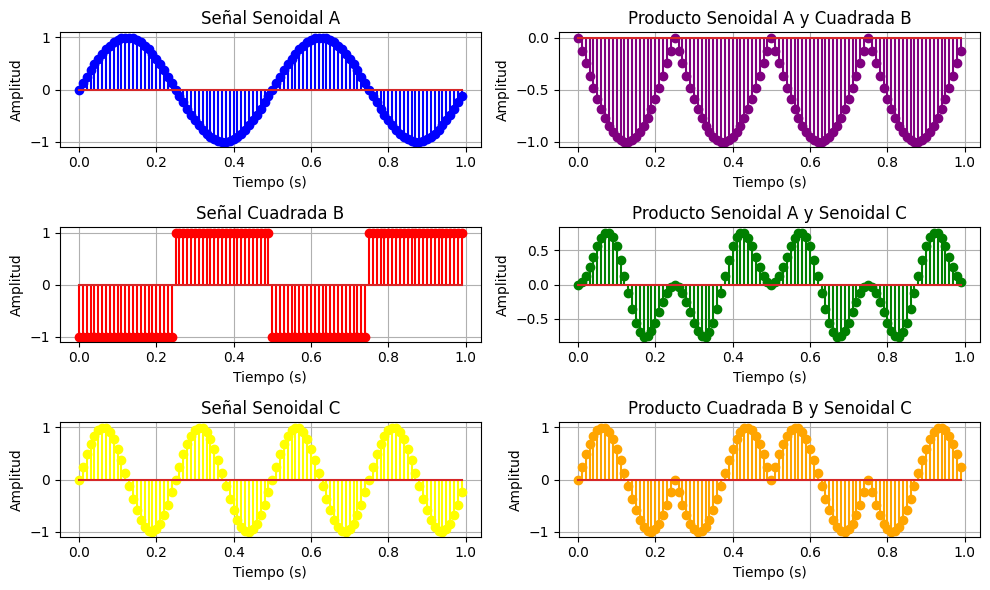

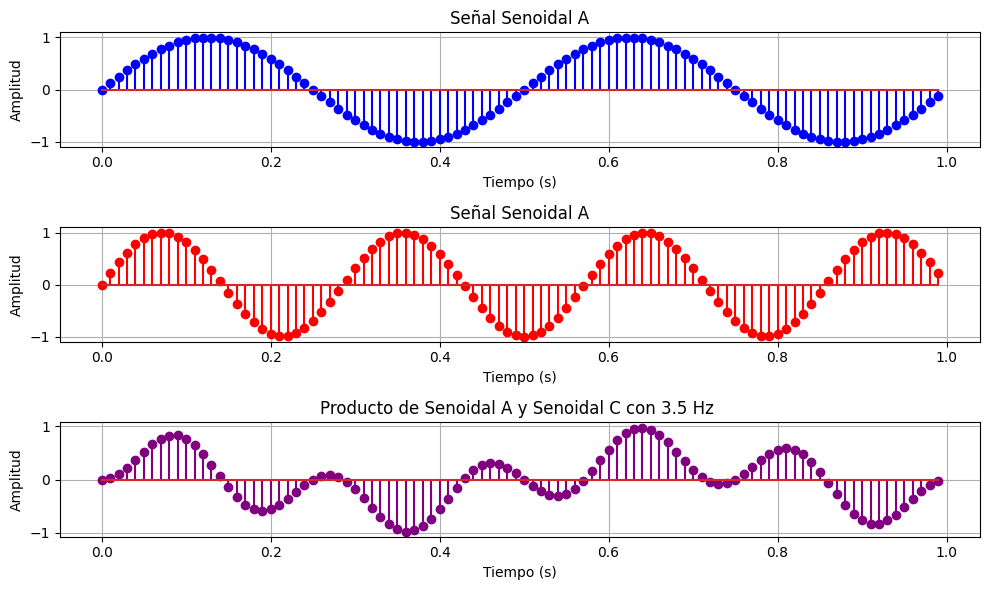

In [2]:
# Solución 2:
import numpy as np
import matplotlib.pyplot as plt

def cuadrada(tinicial, tfinal, fs, fm, phi, A):
    T = 1/fm
    t = np.arange(tinicial,tfinal,T)
    y = np.zeros(len(t))

    for i in range(len(t)):
        if np.mod(2*np.pi*fs*t[i] + phi,2*np.pi) >= np.pi:
            y[i] = -1*A
        else:
            y[i] = 1*A
    return t, y

def senoidal(tinicial, tfinal, fs, fm, phi, A):
    Ts = 1 / fm 
    t = np.arange(tinicial, tfinal, Ts)  
    y = A * np.sin(2 * np.pi * fs * t + phi)  
    return t, y
  
# Definición de parámetros
tinicial = 0  # Tiempo inicial
tfinal = 1.0  # Tiempo final
fsA = 2 # Frecuencia señal Senoidal a
fsB = 2 # Frecuencia señal Cuadrada
fsC = 4 # Frecuencia señal senoidal c
A = 1  # Amplitud de la señal
phi = 0 # Fase de las señales
fm = 100 # Frecuencia de muestreo

[t,yA] = senoidal(tinicial, tfinal, fsA, fm, phi, A)  
[t,yB] = cuadrada(tinicial, tfinal, fsB, fm, phi, A)  
[t,yC] = senoidal(tinicial, tfinal, fsC, fm, phi, A)  



#====================================INCISO 1========================================
producto_puntoAB = yA @ yB # Equivale a: np.dot(yA,yB)
producto_puntoAC = yA @ yC # Equivale a: np.dot(yA,yC)
producto_puntoBC = yB @ yC # Equivale a: np.dot(yB,yC) 

ortogonalAB = np.isclose(producto_puntoAB, 0)
ortogonalAC = np.isclose(producto_puntoAC, 0)
ortogonalBC = np.isclose(producto_puntoBC, 0)
print("=====================INCISO 1========================================")
print("Producto punto entre A y B:", producto_puntoAB, " -> ", "Ortogonal" if ortogonalAB else "No ortogonal")
print("Producto punto entre A y C:", producto_puntoAC, " -> ", "Ortogonal" if ortogonalAC else "No ortogonal")
print("Producto punto entre B y C:", producto_puntoBC, " -> ", "Ortogonal" if ortogonalBC else "No ortogonal")

plt.figure(figsize=(10,6))
plt.subplot(3, 2, 1)
plt.stem(t, yA, linefmt="blue", markerfmt="bo")
plt.title('Señal Senoidal A')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.subplot(3, 2, 3)
plt.stem(t, -yB, linefmt="red", markerfmt="ro")
plt.title('Señal Cuadrada B')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.subplot(3, 2, 5)
plt.stem(t, yC, linefmt="yellow", markerfmt="yellow")
plt.title('Señal Senoidal C')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.subplot(3, 2, 2)
plt.stem(t, yA*-yB, linefmt="purple", markerfmt="purple", label='Producto punto A*B')
plt.title('Producto Senoidal A y Cuadrada B')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.subplot(3, 2, 4)
plt.stem(t, yA*yC, linefmt="green", markerfmt="go", label='Producto A*C')
plt.title('Producto Senoidal A y Senoidal C')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.subplot(3, 2, 6)
plt.stem(t, yB*yC, linefmt="orange", markerfmt="orange", label='Producto B*C')
plt.title('Producto Cuadrada B y Senoidal C')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.tight_layout()

#====================================================================================
#====================================INCISO 2========================================
fftA = np.fft.fft(yA) # Transformada de Fourier de la señal Senoidal A
fftB = np.fft.fft(yB) # Transformada de Fourier de la señal Cuadrada B
fftC = np.fft.fft(yC) # Transformada de Fourier de la señal Senoidal C

producto_punto_fft_AB = abs(np.dot(fftA,fftB)) # Equivale a: np.dot(fftA,fftB)
producto_punto_fft_AC = abs(np.dot(fftA,fftC)) # Equivale a: np.dot(fftA,fftC)
producto_punto_fft_BC = abs(np.dot(fftB,fftC)) # Equivale a: np.dot(fftB,fftC) 

ortogonal_fft_AB = np.isclose(producto_punto_fft_AB, 0)
ortogonal_fft_AC = np.isclose(producto_punto_fft_AC, 0)
ortogonal_fft_BC = np.isclose(producto_punto_fft_BC, 0)
print("=====================INCISO 2========================================")
print("Producto punto entre fftA y fftB:", producto_punto_fft_AB, " -> ", "Ortogonal" if ortogonal_fft_AB else "No ortogonal")
print("Producto punto entre fftA y fftC:", producto_punto_fft_AC, " -> ", "Ortogonal" if ortogonal_fft_AC else "No ortogonal")
print("Producto punto entre fftB y fftC:", producto_punto_fft_BC, " -> ", "Ortogonal" if ortogonal_fft_BC else "No ortogonal")


#====================================================================================
#====================================INCISO 3========================================
[t, yC_modificada] = senoidal(tinicial, tfinal, 3.5, fm, phi, A) # Señal senoidal C modificada

plt.figure(figsize=(10,6))
plt.subplot(3, 1, 1)
plt.stem(t, yA, linefmt="blue", markerfmt="bo")
plt.title('Señal Senoidal A')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.subplot(3, 1, 2)
plt.stem(t, yC_modificada, linefmt="red", markerfmt="ro")
plt.title('Señal Senoidal A')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.subplot(3, 1, 3)
plt.stem(t, yA*yC_modificada, linefmt="purple", markerfmt="purple")
plt.title('Producto de Senoidal A y Senoidal C con 3.5 Hz ')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.tight_layout()

producto_punto = yA @ yC_modificada # Producto punto entre la señal Senoidal A y la modificada C
producto_punto_fft = abs(np.dot(np.fft.fft(yA), np.fft.fft(yC_modificada))) # Producto punto en el dominio de la frecuencia
ortogonal = np.isclose(producto_punto, 0)
ortogonal_fft = np.isclose(producto_punto_fft, 0)

print("=====================INCISO 3========================================")
print("Producto punto entre Senoidal A y Senoidal C modificada:", producto_punto, " -> ", "Ortogonal" if ortogonal else "No ortogonal")
print("Producto punto en el dominio de la frecuencia:", producto_punto_fft , " -> ", "Ortogonal" if ortogonal_fft else "No ortogonal")

#====================================================================================


<hr>

# Ejercicio 3:
Verifique la propiedad de retardo temporal de la transformada discreta de Fourier. Para ello, genere una señal senoidal de 10 Hz, muestreada a 100 Hz durante un segundo. Calcule su transformada de Fourier. Modifique esta última de acuerdo a la ecuación de la propiedad, para generar un retardo de 10 muestras. Antitransforme y verifique el cumplimiento de la propiedad.

In [ ]:
# Solución 3:

<hr>

# Ejercicio 4:
Las señales verifican que cuanto más concentrada está su energía en cierta región del dominio temporal, más dispersa estará en el dominio frecuencial, y viceversa. Ejemplos extremos de esto son una señal senoidal, que tiene su energía distribuida a lo largo de toda la señal, pero en dominio frecuencial ésta se concentra en la frecuencia de la misma, y un delta de Dirac, que en dominio temporal tiene toda su energía concentrada en un instante, pero en dominio frecuencial contiene todas las frecuencias. Explore esta propiedad utilizando ventanas temporales, más o menos concentradas alrededor de cierto tiempo, y calculando sus respectivas transformadas de Fourier.


n_fft 2048


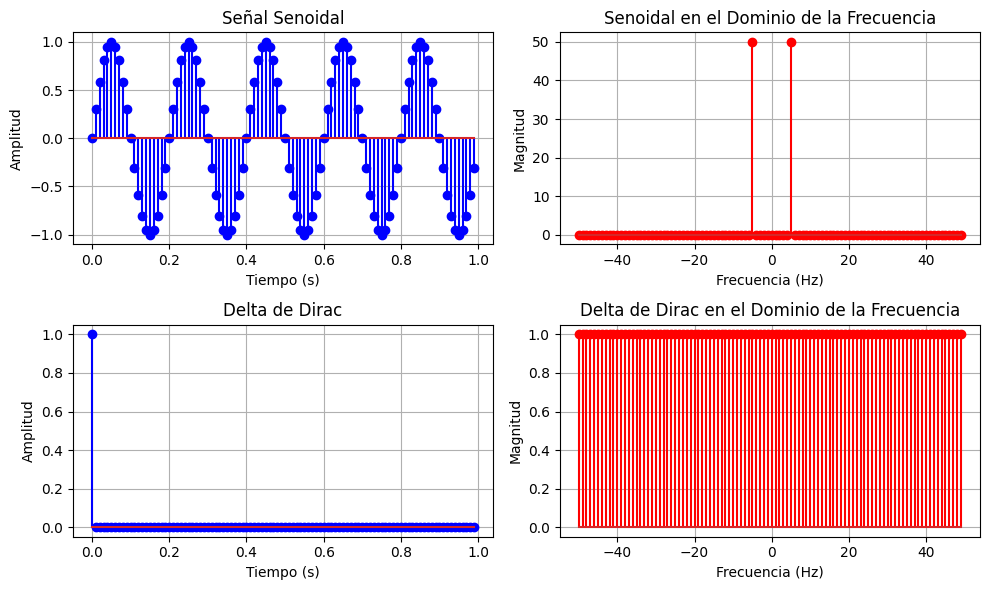

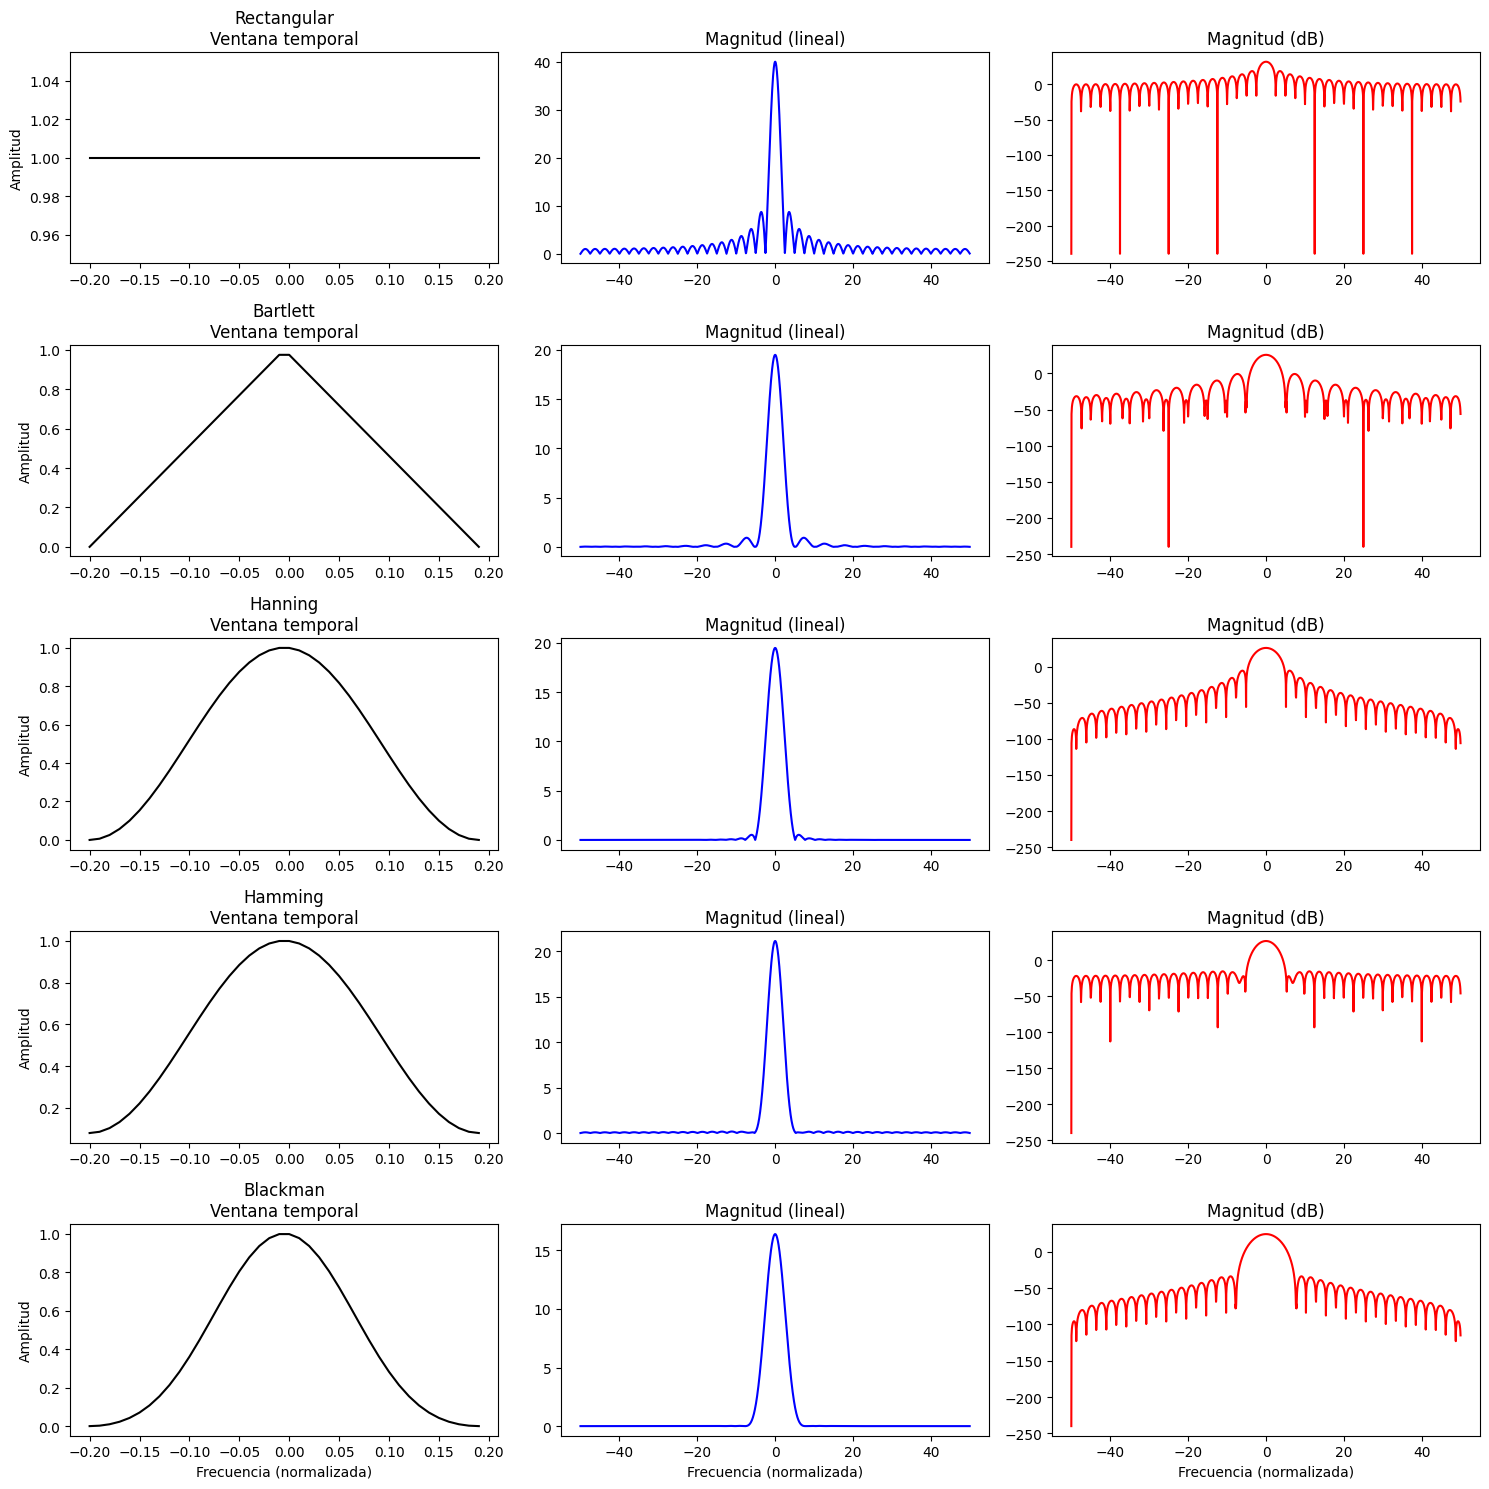

In [49]:
# Solución 4:
tinicial = 0 # Tiempo inicial
tfinal = 1.0 # Tiempo final
fsS = 5 # Frecuencia de la señal
fm = 100 # Frecuencia de muestreo
phi = 0 # Fase de la señal
A = 1 # Amplitud de la señal

[t, y] = senoidal(tinicial, tfinal, fsS, fm, phi, A) 
delta_dirac = np.zeros(len(t)) # Inicializar delta de Dirac
delta_dirac[0] = 1 # Asignar valor 1 al primer elemento

fft_senoidal = np.fft.fft(y) #Transformada de Fourier de la Senoidal
fft_dirac = np.fft.fft(delta_dirac) #Transformada de Fourier del delta de Dirac
f = np.fft.fftfreq(len(t), d=1/fm) # Frecuencias correspondientes a la FFT
fft_senoidal = np.abs(fft_senoidal) # Magnitud de la FFT de la Senoidal
fft_dirac = np.abs(fft_dirac) # Magnitud de la FFT del delta de Dirac

plt.figure(figsize=(10,6))
plt.subplot(2, 2, 1)
plt.stem(t, y, linefmt="blue", markerfmt="bo")
plt.title('Señal Senoidal')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.subplot(2, 2, 3)
plt.stem(t, delta_dirac, linefmt="blue", markerfmt="bo")
plt.title('Delta de Dirac')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.subplot(2, 2, 2)
plt.stem(f,fft_senoidal, linefmt="red", markerfmt="ro")
plt.title('Senoidal en el Dominio de la Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid()
plt.subplot(2, 2, 4)
plt.stem(f,fft_dirac, linefmt="red", markerfmt="ro")
plt.title('Delta de Dirac en el Dominio de la Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid()
plt.tight_layout()
#=============Ventana cuadrada======================
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
tinicial=-0.2
tfinal=0.2
fm = 100
t = np.arange(tinicial, tfinal, 1/fm)  
tamanio_ventana = len(t)
n_fft = 2048
print('n_fft',n_fft)

# Ventanas disponibles con numpy
ventanas = {
    'Rectangular': np.ones(tamanio_ventana),
    'Bartlett': np.bartlett(tamanio_ventana),
    'Hanning': np.hanning(tamanio_ventana),
    'Hamming': np.hamming(tamanio_ventana),
    'Blackman': np.blackman(tamanio_ventana)
}
freq = np.fft.fftshift(np.fft.fftfreq(n_fft, d=1/fm)) # Centrar el eje de frecuencias

# Figura
num_ventanas = len(ventanas)
fig, axes = plt.subplots(num_ventanas, 3, figsize=(15, 3 * num_ventanas))
fig.subplots_adjust(hspace=0.4)

# Procesar cada ventana
for i, (name, ventana) in enumerate(ventanas.items()):
    fft_window = np.fft.fftshift(np.fft.fft(ventana, n=n_fft))
    magnitud = np.abs(fft_window)
    magnitud_db = 20 * np.log10(magnitud + 1e-12)

    axes[i, 0].plot(t, ventana, color='black')
    axes[i, 0].set_title(f'{name}\nVentana temporal')

    axes[i, 1].plot(freq, magnitud, color='blue')
    axes[i, 1].set_title('Magnitud (lineal)')
    

    axes[i, 2].plot(freq, magnitud_db, color='red')
    axes[i, 2].set_title('Magnitud (dB)')
   
    if i == num_ventanas - 1:
        for j in range(3):
            axes[i, j].set_xlabel('Frecuencia (normalizada)')
    axes[i, 0].set_ylabel('Amplitud')

plt.tight_layout()
plt.show()




<hr>

# Ejercicio 5:
La Figura 1 representa la magnitud de la FFT de una señal senoidal de 27 Hz, muestreada durante 1 s y a una frecuencia de muestreo de 50 Hz. La señal muestreada responde a la ecuación $x(t) = 2 \sin(2\pi 27t)$.

1. Determine la frecuencia de la señal que observa. Explique la discrepancia con frecuencia de la señal original.

2. Deduzca una ecuación para determinar cómo se genera la señal de la frecuencia observada, a partir de la frecuencia original y los parámetros del muestreo. Verifique la validez de su ecuación para otras señales, por ejemplo una de 105 Hz.

3. Determine la relación entre la magnitud observada de la transformada y la amplitud de la señal original.

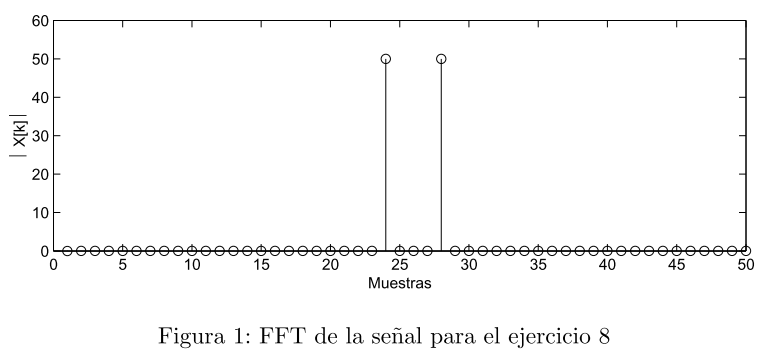

In [ ]:
# Solución 5:

<hr>

# Ejercicio 6:
La señal que se encuentra en el archivo **necg.txt** corresponde al registro de la actividad eléctrica del corazón de un paciente. Esta señal se ha digitalizado a razón de 360 muestras por segundo. Se sabe que el registro ha sido contaminado con un ruido en la banda de 40 a 180 Hz y se necesita eliminarlo para poder realizar un diagnóstico adecuado. Utilice la TDF para filtrar la señal.

In [ ]:
# Solución 6:
import numpy as np
import matplotlib.pyplot as plt

# Cargar señal
senal = np.loadtxt('necg.txt')
fs = 360  # Frecuencia de muestreo en Hz
n = len(senal)
t = np.arange(n) / fs

# FFT de la señal
fft_senal = np.fft.fft(senal)
frecuencias = np.fft.fftfreq(n, d=1/fs)

# Crear una copia para filtrar
fft_filtrada = fft_senal.copy()

# Anular componentes entre 40 y 180 Hz (positivo y negativo)
f1, f2 = 40, 180
fft_filtrada[(np.abs(frecuencias) >= f1) & (np.abs(frecuencias) <= f2)] = 0

# Señal reconstruida (inversa de la TDF)
senal_filtrada = np.fft.ifft(fft_filtrada).real

# Graficar
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(t, senal, label='Señal original')
plt.title('Señal ECG original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, senal_filtrada, color='orange', label='Señal filtrada')
plt.title('Señal ECG filtrada (eliminando 40-180 Hz)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()
